In [15]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [16]:
amazon = pd.read_csv("amazon_cells_labelled.txt", delimiter="\t", header=None)
amazon.columns = ["review", "score"]
amazon = amazon[["score", "review"]] # Swapping the columns to satiate my OCD
print(amazon.shape)
amazon.head()

(1000, 2)


,score,review
0,0,So there is no way for me to plug it in here i...
1,1,"Good case, Excellent value."
2,1,Great for the jawbone.
3,0,Tied to charger for conversations lasting more...
4,1,The mic is great.


In [17]:
# Try to classify the postive sentiment with keywords that I would expect to find positive reviews
keywords = ["good", "excellent", "great", "impressed", "fantastic", "incredible", "awesome", "love"]

In [18]:
for word in keywords:
    amazon[str(word)] = amazon["review"].str.contains(' ' + str(word) + ' ', case=False)
amazon.head()

,score,review,good,excellent,great,impressed,fantastic,incredible,awesome,love
0,0,So there is no way for me to plug it in here i...,False,False,False,False,False,False,False,False
1,1,"Good case, Excellent value.",False,True,False,False,False,False,False,False
2,1,Great for the jawbone.,False,False,False,False,False,False,False,False
3,0,Tied to charger for conversations lasting more...,False,False,False,False,False,False,False,False
4,1,The mic is great.,False,False,False,False,False,False,False,False


In [19]:
# Turn score column into a boolean where a positive review (1) becomes True and a negative review (0) becomes false
amazon["score"] = (amazon["score"] == 1)
amazon.head()

,score,review,good,excellent,great,impressed,fantastic,incredible,awesome,love
0,False,So there is no way for me to plug it in here i...,False,False,False,False,False,False,False,False
1,True,"Good case, Excellent value.",False,True,False,False,False,False,False,False
2,True,Great for the jawbone.,False,False,False,False,False,False,False,False
3,False,Tied to charger for conversations lasting more...,False,False,False,False,False,False,False,False
4,True,The mic is great.,False,False,False,False,False,False,False,False


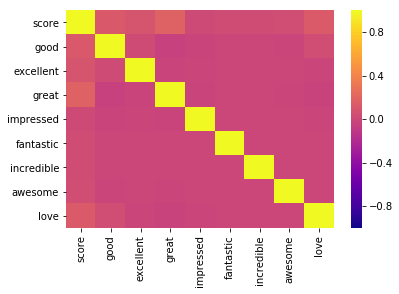

In [20]:
# heatmap of correlations among features and target
sns.heatmap(amazon.corr(), vmax=1.0, vmin=-1.0, cmap="plasma")
plt.show()

# This looks okay...the features would seem to be pretty independent

In [31]:
data = amazon[keywords]
target = amazon["score"]
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(data, target)
y_pred = bnb.predict(data)
print("Number of mislabeled points out of a total {} points : {}".format(data.shape[0], (target != y_pred).sum()))
print("Sucess rate: {}%".format(100 * (1 - (target != y_pred).sum() / data.shape[0])))

Number of mislabeled points out of a total 1000 points : 416
Sucess rate: 58.400000000000006%


That doesn't look great. Searching the internet, I found a [list of positve sentiment keywords](http://ptrckprry.com/course/ssd/data/positive-words.txt). So let's give those a run... 

In [27]:
# Load the data again
amazon = pd.read_csv("amazon_cells_labelled.txt", delimiter="\t", header=None)
amazon.columns = ["review", "score"]
amazon = amazon[["score", "review"]] # Swapping the columns to satiate my OCD
print(amazon.shape)
amazon.head()

(1000, 2)


,score,review
0,0,So there is no way for me to plug it in here i...
1,1,"Good case, Excellent value."
2,1,Great for the jawbone.
3,0,Tied to charger for conversations lasting more...
4,1,The mic is great.


In [28]:
# Load positve keywords list and add features
pos = pd.read_csv("pos_words.csv", header=None)
pos[0].head()

for word in pos[0]:
    amazon[str(word)] = amazon["review"].str.contains(' ' + str(word) + ' ', case=False)
amazon.head()

,score,review,a+,abound,abounds,abundance,abundant,accessable,accessible,acclaim,...,wow,wowed,wowing,wows,yay,youthful,zeal,zenith,zest,zippy
0,0,So there is no way for me to plug it in here i...,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,"Good case, Excellent value.",False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,Great for the jawbone.,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,Tied to charger for conversations lasting more...,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1,The mic is great.,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [29]:
# Turn score column into a boolean where a positive review (1) becomes True and a negative review (0) becomes false
amazon["score"] = (amazon["score"] == 1)
amazon.head()

,score,review,a+,abound,abounds,abundance,abundant,accessable,accessible,acclaim,...,wow,wowed,wowing,wows,yay,youthful,zeal,zenith,zest,zippy
0,False,So there is no way for me to plug it in here i...,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,"Good case, Excellent value.",False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,Great for the jawbone.,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,Tied to charger for conversations lasting more...,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,The mic is great.,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [32]:
# Run the model
data = amazon[pos[0]]
target = amazon["score"]
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(data, target)
y_pred = bnb.predict(data)
print("Number of mislabeled points out of a total {} points : {}".format(data.shape[0], (target != y_pred).sum()))
print("Sucess rate: {}%".format(100 * (1 - (target != y_pred).sum() / data.shape[0])))

Number of mislabeled points out of a total 1000 points : 272
Sucess rate: 72.8%


Much better. We now try the same features on the Yelp dataset

In [33]:
yelp = pd.read_csv("yelp_labelled.txt", delimiter="\t", header=None)
yelp.columns = ["review", "score"]
yelp = yelp[["score", "review"]]
print(yelp.shape)
yelp.head()

(1000, 2)


,score,review
0,1,Wow... Loved this place.
1,0,Crust is not good.
2,0,Not tasty and the texture was just nasty.
3,1,Stopped by during the late May bank holiday of...
4,1,The selection on the menu was great and so wer...


In [34]:
for word in pos[0]:
    yelp[str(word)] = yelp["review"].str.contains(' ' + str(word) + ' ', case=False)
yelp.head()

,score,review,a+,abound,abounds,abundance,abundant,accessable,accessible,acclaim,...,wow,wowed,wowing,wows,yay,youthful,zeal,zenith,zest,zippy
0,1,Wow... Loved this place.,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,Crust is not good.,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0,Not tasty and the texture was just nasty.,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,Stopped by during the late May bank holiday of...,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1,The selection on the menu was great and so wer...,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [35]:
yelp["score"] = (yelp["score"] == 1)
yelp.head()

,score,review,a+,abound,abounds,abundance,abundant,accessable,accessible,acclaim,...,wow,wowed,wowing,wows,yay,youthful,zeal,zenith,zest,zippy
0,True,Wow... Loved this place.,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,Crust is not good.,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,Not tasty and the texture was just nasty.,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,Stopped by during the late May bank holiday of...,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,The selection on the menu was great and so wer...,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [36]:
data = yelp[pos[0]]
target = yelp["score"]
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(data, target)
y_pred = bnb.predict(data)
print("Number of mislabeled points out of a total {} points : {}".format(data.shape[0], (target != y_pred).sum()))
print("Sucess rate: {}%".format(100 * (1 - (target != y_pred).sum() / data.shape[0])))

Number of mislabeled points out of a total 1000 points : 278
Sucess rate: 72.2%


That's pretty much the same result we got from the Amazon dataset.